In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e23/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e23/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s3e23/sample_submission.csv")

### checking data types

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [4]:
train.defects = train.defects.astype(int)

### checking descriptives

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
train.describe(percentiles=[0.9,0.95,0.99]).T

,count,mean,std,min,50%,90%,95%,99%,max
id,101763.0,50881.000000,29376.592059,0.0,50881.00,91585.80,96673.900,100744.38,101762.00
loc,101763.0,37.347160,54.600401,1.0,22.00,80.00,113.000,226.00,3442.00
v(g),101763.0,5.492684,7.900855,1.0,3.00,12.00,17.000,33.38,404.00
ev(g),101763.0,2.845022,4.631262,1.0,1.00,7.00,11.000,23.00,165.00
iv(g),101763.0,3.498826,5.534541,1.0,2.00,7.00,10.000,19.00,402.00
n,101763.0,96.655995,171.147191,0.0,51.00,205.00,312.000,756.00,8441.00
v,101763.0,538.280956,1270.791601,0.0,232.79,1148.86,1812.591,5033.79,80843.08
l,101763.0,0.111634,0.100096,0.0,0.09,0.24,0.320,0.50,1.00
d,101763.0,13.681881,14.121306,0.0,9.82,28.75,37.730,62.37,418.20
i,101763.0,27.573007,22.856742,0.0,23.36,49.24,61.900,107.69,569.78


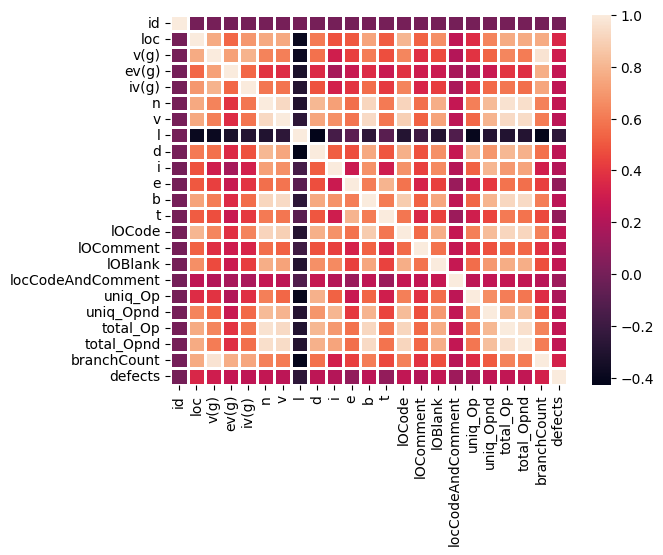

In [6]:
sns.heatmap(train.corr(),linewidths=1);

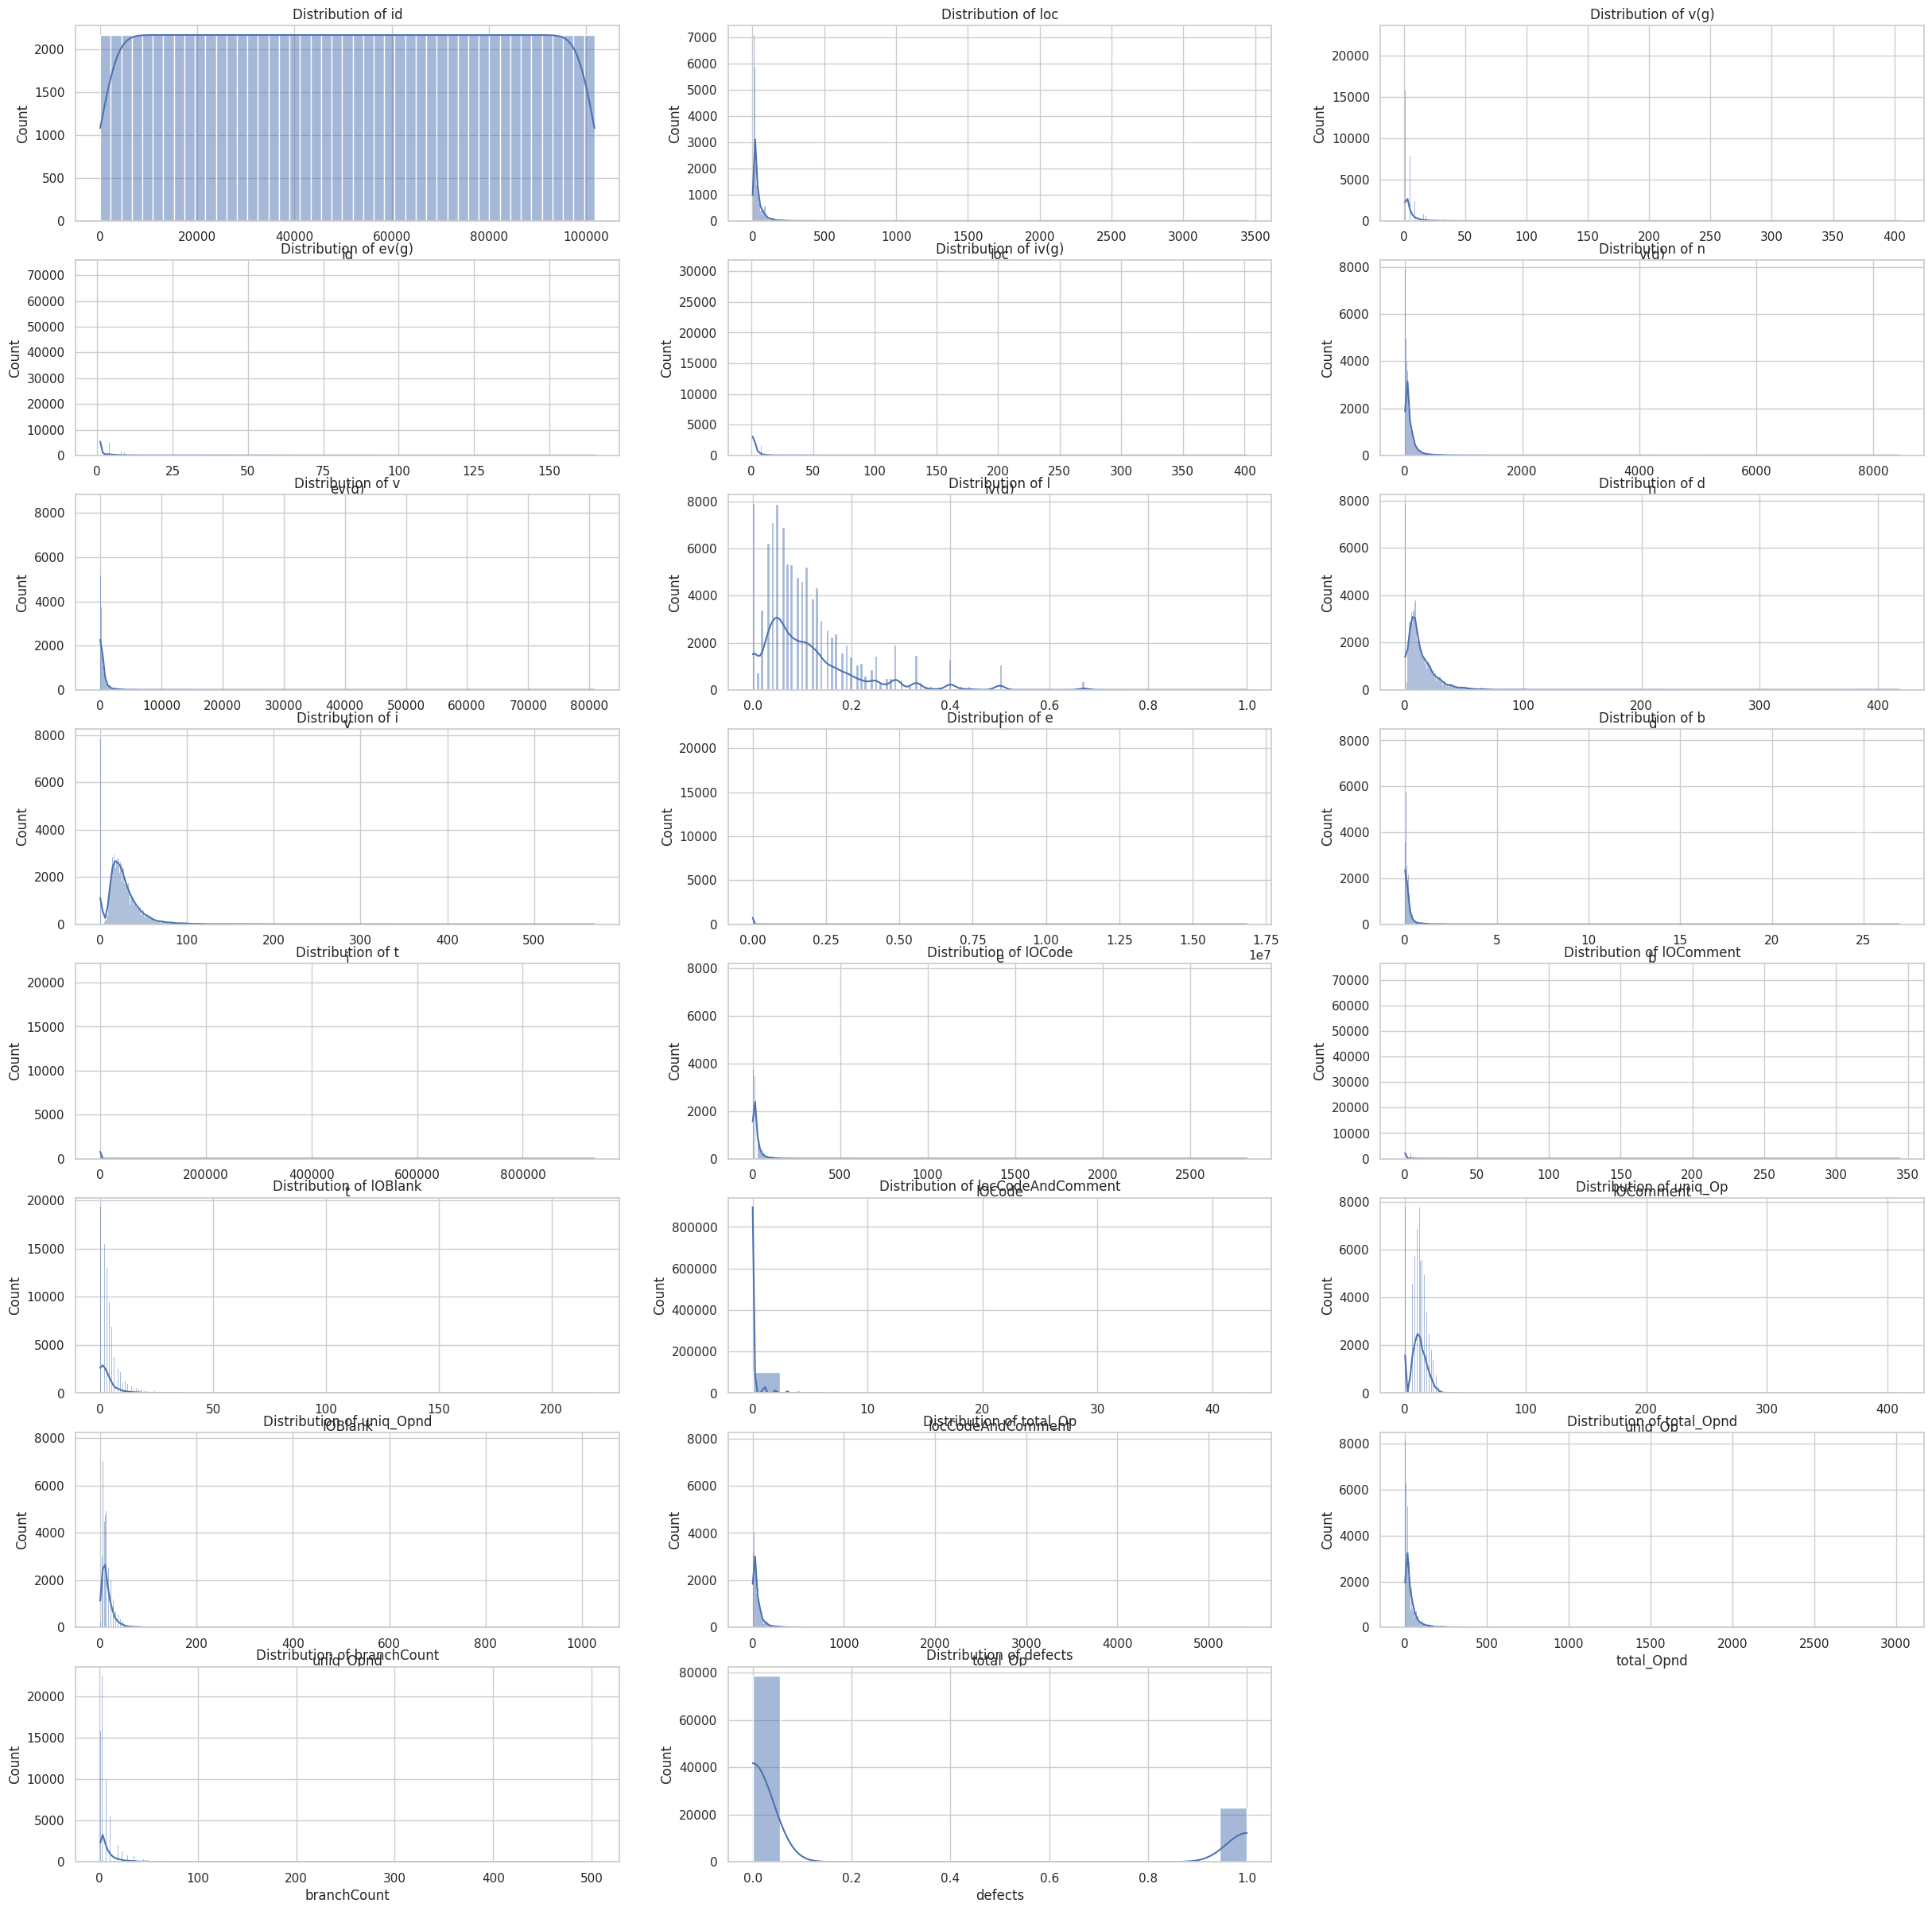

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
sns.set(style="whitegrid")

for i, feature in enumerate(train.columns):
    plt.subplot(np.round(train.shape[1]/3).astype(int), 3, i + 1)
    sns.histplot(train[feature], kde=True);  # Create a histogram with a kernel density estimate
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

In [8]:
train.iloc[:,1:-1]

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,45.09,7,0,1,0,11.0,8.0,16.0,12.0,3.0
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,626.01,23,0,2,0,18.0,20.0,67.0,40.0,9.0
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,327.43,20,0,4,0,10.0,8.0,51.0,28.0,1.0
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,85.22,7,0,1,0,11.0,14.0,24.0,19.0,3.0


In [9]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)
val_scores = []

def objective(trial):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators',500,1000),
        'max_depth': trial.suggest_int('max_depth',1,4),
        'eta': trial.suggest_float('eta',0.1,0.5),
        'min_child_weight': trial.suggest_int('min_child_weight',100,1000),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.5,1),
        'objective': 'binary:logistic'
    }
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        xgbc = XGBClassifier(**params)
        xgbc.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], xgbc.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 05:14:50,346] A new study created in memory with name: no-name-604bdc6f-3c24-433d-ab6c-dd2eeb2dcc01
[I 2023-10-18 05:15:37,773] Trial 0 finished with value: 0.7905782084556038 and parameters: {'n_estimators': 542, 'max_depth': 1, 'eta': 0.37468703720483454, 'min_child_weight': 271, 'colsample_bytree': 0.5408057744795248}. Best is trial 0 with value: 0.7905782084556038.
[I 2023-10-18 05:16:39,897] Trial 1 finished with value: 0.79064499598472 and parameters: {'n_estimators': 634, 'max_depth': 1, 'eta': 0.3385077892831364, 'min_child_weight': 705, 'colsample_bytree': 0.6749273689171655}. Best is trial 1 with value: 0.79064499598472.
[I 2023-10-18 05:18:01,107] Trial 2 finished with value: 0.7906686542089454 and parameters: {'n_estimators': 802, 'max_depth': 1, 'eta': 0.2121452247319697, 'min_child_weight': 242, 'colsample_bytree': 0.7338930832920496}. Best is trial 2 with value: 0.7906686542089454.
[I 2023-10-18 05:20:02,514] Trial 3 finished with value: 0.7907372747221881 

In [10]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)
val_scores = []

def objective(trial):
    
    params = {
        'iterations': trial.suggest_int('n_estimators',500,1000),
        'depth': trial.suggest_int('max_depth',1,4),
        'learning_rate': trial.suggest_float('eta',0.1,0.5),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel',0.5,1),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg',0.1,1),
        'grow_policy': 'Depthwise'
    }
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        cbc = CatBoostClassifier(**params,verbose=False)
        cbc.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], cbc.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 06:04:09,090] A new study created in memory with name: no-name-9c9eece9-3303-42da-b64c-8d4fce0b04e6
[I 2023-10-18 06:05:27,917] Trial 0 finished with value: 0.791793557935679 and parameters: {'n_estimators': 629, 'max_depth': 2, 'eta': 0.16254497102224658, 'colsample_bylevel': 0.5669186062737714, 'l2_leaf_reg': 0.7465631954499025}. Best is trial 0 with value: 0.791793557935679.
[I 2023-10-18 06:07:22,854] Trial 1 finished with value: 0.7914958681994482 and parameters: {'n_estimators': 853, 'max_depth': 2, 'eta': 0.17650957415430774, 'colsample_bylevel': 0.9140466924134342, 'l2_leaf_reg': 0.20861827814128647}. Best is trial 0 with value: 0.791793557935679.
[I 2023-10-18 06:08:53,108] Trial 2 finished with value: 0.7915489813427071 and parameters: {'n_estimators': 738, 'max_depth': 2, 'eta': 0.14713221940605248, 'colsample_bylevel': 0.5555507865415464, 'l2_leaf_reg': 0.4049133908706992}. Best is trial 0 with value: 0.791793557935679.
[I 2023-10-18 06:10:53,867] Trial 3 fini

In [11]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)

def objective(trial):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators',500,1000),
        'max_depth': trial.suggest_int('max_depth',1,4),
        'learning_rate': trial.suggest_float('learning_rate',0.1,0.5),
        'feature_fraction': trial.suggest_float('feature_fraction',0.5,1),
        'reg_lambda': trial.suggest_float('reg_lambda',0.5,1),
        'min_child_samples': trial.suggest_int('min_child_samples',100,1000)
    }
    
    val_scores = []
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        lgbm = LGBMClassifier(**params,verbose=-1)
        lgbm.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], lgbm.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 06:37:52,577] A new study created in memory with name: no-name-0d982b68-55c4-40b2-88e8-7a0377177976


[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9468709714502486
[LightGBM] [Warning] feature_fraction is set=0.9468709714502486, colsample_b

[I 2023-10-18 06:38:43,612] Trial 0 finished with value: 0.7692531273477873 and parameters: {'n_estimators': 898, 'max_depth': 4, 'learning_rate': 0.47406731165979565, 'feature_fraction': 0.9468709714502486, 'reg_lambda': 0.8585295142332977, 'min_child_samples': 137}. Best is trial 0 with value: 0.7692531273477873.


[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8075082008453722
[LightGBM] [Warning] feature_fraction is set=0.8075082008453722, colsample_b

[I 2023-10-18 06:39:10,739] Trial 1 finished with value: 0.7895547983478306 and parameters: {'n_estimators': 510, 'max_depth': 3, 'learning_rate': 0.38217492144024734, 'feature_fraction': 0.8075082008453722, 'reg_lambda': 0.7240874238912305, 'min_child_samples': 728}. Best is trial 1 with value: 0.7895547983478306.


[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9122349674281389
[LightGBM] [Warning] feature_fraction is set=0.9122349674281389, colsample_b

[I 2023-10-18 06:39:57,558] Trial 2 finished with value: 0.7880596557010336 and parameters: {'n_estimators': 848, 'max_depth': 4, 'learning_rate': 0.19533412037769052, 'feature_fraction': 0.9122349674281389, 'reg_lambda': 0.9014376730183942, 'min_child_samples': 374}. Best is trial 1 with value: 0.7895547983478306.


[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9306255587219894
[LightGBM] [Warning] feature_fraction is set=0.9306255587219894, colsample_b

[I 2023-10-18 06:40:36,950] Trial 3 finished with value: 0.7912292277280255 and parameters: {'n_estimators': 973, 'max_depth': 2, 'learning_rate': 0.32661451820223053, 'feature_fraction': 0.9306255587219894, 'reg_lambda': 0.6300940102003199, 'min_child_samples': 963}. Best is trial 3 with value: 0.7912292277280255.


[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8469013365685423
[LightGBM] [Warning] feature_fraction is set=0.8469013365685423, colsample_b

[I 2023-10-18 06:40:59,301] Trial 4 finished with value: 0.7910599511500445 and parameters: {'n_estimators': 671, 'max_depth': 1, 'learning_rate': 0.3178109619137859, 'feature_fraction': 0.8469013365685423, 'reg_lambda': 0.5445710840002735, 'min_child_samples': 770}. Best is trial 3 with value: 0.7912292277280255.


[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5771576374437175
[LightGBM] [Warning] feature_fraction is set=0.5771576374437175, colsample_b

[I 2023-10-18 06:41:45,446] Trial 5 finished with value: 0.7851507155199486 and parameters: {'n_estimators': 931, 'max_depth': 3, 'learning_rate': 0.38397399334041404, 'feature_fraction': 0.5771576374437175, 'reg_lambda': 0.9372501242248348, 'min_child_samples': 342}. Best is trial 3 with value: 0.7912292277280255.


[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9459581284253946
[LightGBM] [Warning] feature_fraction is set=0.9459581284253946, colsample_b

[I 2023-10-18 06:42:15,147] Trial 6 finished with value: 0.7904089460317569 and parameters: {'n_estimators': 610, 'max_depth': 3, 'learning_rate': 0.20719206510116478, 'feature_fraction': 0.9459581284253946, 'reg_lambda': 0.6032264840080885, 'min_child_samples': 141}. Best is trial 3 with value: 0.7912292277280255.


[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7133340347255341
[LightGBM] [Warning] feature_fraction is set=0.7133340347255341, colsample_b

[I 2023-10-18 06:43:03,432] Trial 7 finished with value: 0.7765903632169608 and parameters: {'n_estimators': 818, 'max_depth': 4, 'learning_rate': 0.4881152291465256, 'feature_fraction': 0.7133340347255341, 'reg_lambda': 0.6749143234758457, 'min_child_samples': 391}. Best is trial 3 with value: 0.7912292277280255.


[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8535000324191995
[LightGBM] [Warning] feature_fraction is set=0.8535000324191995, colsample_b

[I 2023-10-18 06:43:32,777] Trial 8 finished with value: 0.7912528023291943 and parameters: {'n_estimators': 862, 'max_depth': 1, 'learning_rate': 0.19624842038849064, 'feature_fraction': 0.8535000324191995, 'reg_lambda': 0.5400943173571415, 'min_child_samples': 799}. Best is trial 8 with value: 0.7912528023291943.


[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.647881265057788
[LightGBM] [Warning] feature_fraction is set=0.647881265057788, colsample_bytree=1.0 wil

[I 2023-10-18 06:44:13,994] Trial 9 finished with value: 0.7872631426949124 and parameters: {'n_estimators': 799, 'max_depth': 3, 'learning_rate': 0.4022660849696843, 'feature_fraction': 0.647881265057788, 'reg_lambda': 0.9785576495038442, 'min_child_samples': 988}. Best is trial 8 with value: 0.7912528023291943.


[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7635275618297098
[LightGBM] [Warning] feature_fraction is set=0.7635275618297098, colsample_b

[I 2023-10-18 06:44:39,336] Trial 10 finished with value: 0.7904317204420857 and parameters: {'n_estimators': 714, 'max_depth': 1, 'learning_rate': 0.10757562346477766, 'feature_fraction': 0.7635275618297098, 'reg_lambda': 0.5124319194952017, 'min_child_samples': 687}. Best is trial 8 with value: 0.7912528023291943.


[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9910223637401283
[LightGBM] [Warning] feature_fraction is set=0.9910223637401283, colsample_b

[I 2023-10-18 06:45:21,677] Trial 11 finished with value: 0.791608793109348 and parameters: {'n_estimators': 994, 'max_depth': 2, 'learning_rate': 0.2576669859288698, 'feature_fraction': 0.9910223637401283, 'reg_lambda': 0.6174808484548763, 'min_child_samples': 995}. Best is trial 11 with value: 0.791608793109348.


[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9920134947747232
[LightGBM] [Warning] feature_fraction is set=0.9920134947747232, colsample_b

[I 2023-10-18 06:46:01,586] Trial 12 finished with value: 0.7919067350873916 and parameters: {'n_estimators': 991, 'max_depth': 2, 'learning_rate': 0.2397540214171552, 'feature_fraction': 0.9920134947747232, 'reg_lambda': 0.573360899268103, 'min_child_samples': 868}. Best is trial 12 with value: 0.7919067350873916.


[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9944328171518053
[LightGBM] [Warning] feature_fraction is set=0.9944328171518053, colsample_b

[I 2023-10-18 06:46:41,061] Trial 13 finished with value: 0.7916397567190964 and parameters: {'n_estimators': 972, 'max_depth': 2, 'learning_rate': 0.2587208312565224, 'feature_fraction': 0.9944328171518053, 'reg_lambda': 0.7572330426313407, 'min_child_samples': 886}. Best is trial 12 with value: 0.7919067350873916.


[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9990842475533702
[LightGBM] [Warning] feature_fraction is set=0.9990842475533702, colsample_b

[I 2023-10-18 06:47:19,772] Trial 14 finished with value: 0.7910745041664384 and parameters: {'n_estimators': 937, 'max_depth': 2, 'learning_rate': 0.2881041610546989, 'feature_fraction': 0.9990842475533702, 'reg_lambda': 0.7815972191883911, 'min_child_samples': 563}. Best is trial 12 with value: 0.7919067350873916.


[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8794144154427574
[LightGBM] [Warning] feature_fraction is set=0.8794144154427574, colsample_b

[I 2023-10-18 06:47:51,718] Trial 15 finished with value: 0.7917296308752946 and parameters: {'n_estimators': 765, 'max_depth': 2, 'learning_rate': 0.24474290491421635, 'feature_fraction': 0.8794144154427574, 'reg_lambda': 0.7666140705213889, 'min_child_samples': 861}. Best is trial 12 with value: 0.7919067350873916.


[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8838807021130795
[LightGBM] [Warning] feature_fraction is set=0.8838807021130795, colsample_b

[I 2023-10-18 06:48:23,239] Trial 16 finished with value: 0.7925222413721746 and parameters: {'n_estimators': 745, 'max_depth': 2, 'learning_rate': 0.14711981720651612, 'feature_fraction': 0.8838807021130795, 'reg_lambda': 0.802927354680051, 'min_child_samples': 627}. Best is trial 16 with value: 0.7925222413721746.


[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8780354971718294
[LightGBM] [Warning] feature_fraction is set=0.8780354971718294, colsample_b

[I 2023-10-18 06:48:44,900] Trial 17 finished with value: 0.7903607624078226 and parameters: {'n_estimators': 623, 'max_depth': 1, 'learning_rate': 0.11146931282985603, 'feature_fraction': 0.8780354971718294, 'reg_lambda': 0.8334045205503838, 'min_child_samples': 578}. Best is trial 16 with value: 0.7925222413721746.


[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8062467354960533
[LightGBM] [Warning] feature_fraction is set=0.8062467354960533, colsample_b

[I 2023-10-18 06:49:17,250] Trial 18 finished with value: 0.7923695186834114 and parameters: {'n_estimators': 725, 'max_depth': 2, 'learning_rate': 0.1623939325801714, 'feature_fraction': 0.8062467354960533, 'reg_lambda': 0.698277707457287, 'min_child_samples': 647}. Best is trial 16 with value: 0.7925222413721746.


[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7850138268958933
[LightGBM] [Warning] feature_fraction is set=0.7850138268958933, colsample_b

[I 2023-10-18 06:49:54,488] Trial 19 finished with value: 0.7914198923620852 and parameters: {'n_estimators': 715, 'max_depth': 3, 'learning_rate': 0.15540983554660873, 'feature_fraction': 0.7850138268958933, 'reg_lambda': 0.6999133081217341, 'min_child_samples': 476}. Best is trial 16 with value: 0.7925222413721746.


In [12]:
import optuna
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)

def objective(trial):
    
    params = {
        'n_estimators': 100,
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',50,200),
        'max_features': 1
    }
    
    val_scores = []
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        hbc = ExtraTreesClassifier(**params)
        hbc.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], hbc.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 06:49:54,955] A new study created in memory with name: no-name-3238743f-35f8-451e-8922-d69376d3c7fc
[I 2023-10-18 06:50:06,187] Trial 0 finished with value: 0.7733418152847934 and parameters: {'min_samples_leaf': 179}. Best is trial 0 with value: 0.7733418152847934.
[I 2023-10-18 06:50:17,287] Trial 1 finished with value: 0.7726138001686844 and parameters: {'min_samples_leaf': 181}. Best is trial 0 with value: 0.7733418152847934.
[I 2023-10-18 06:50:28,788] Trial 2 finished with value: 0.7743799260752555 and parameters: {'min_samples_leaf': 105}. Best is trial 2 with value: 0.7743799260752555.
[I 2023-10-18 06:50:40,431] Trial 3 finished with value: 0.772777277186495 and parameters: {'min_samples_leaf': 67}. Best is trial 2 with value: 0.7743799260752555.
[I 2023-10-18 06:50:51,679] Trial 4 finished with value: 0.7730402025486295 and parameters: {'min_samples_leaf': 91}. Best is trial 2 with value: 0.7743799260752555.
[I 2023-10-18 06:51:02,742] Trial 5 finished with valu

In [13]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)

def objective(trial):
    
    params = {
        'n_estimators': 100,
        'min_samples_leaf': trial.suggest_int('min_samples_leaf',100,300),
        'max_features': 1
    }
    
    val_scores = []
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        rfc = RandomForestClassifier(**params)
        rfc.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], rfc.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 06:53:41,540] A new study created in memory with name: no-name-745f25e5-3d74-45a1-910a-4a9127334f75
[I 2023-10-18 06:54:29,297] Trial 0 finished with value: 0.7840437441145014 and parameters: {'min_samples_leaf': 159}. Best is trial 0 with value: 0.7840437441145014.
[I 2023-10-18 06:55:19,600] Trial 1 finished with value: 0.7847341479198382 and parameters: {'min_samples_leaf': 110}. Best is trial 1 with value: 0.7847341479198382.
[I 2023-10-18 06:56:05,539] Trial 2 finished with value: 0.7838438895804418 and parameters: {'min_samples_leaf': 191}. Best is trial 1 with value: 0.7847341479198382.
[I 2023-10-18 06:56:55,330] Trial 3 finished with value: 0.7844272427283131 and parameters: {'min_samples_leaf': 120}. Best is trial 1 with value: 0.7847341479198382.
[I 2023-10-18 06:57:41,658] Trial 4 finished with value: 0.7838456932279397 and parameters: {'min_samples_leaf': 182}. Best is trial 1 with value: 0.7847341479198382.
[I 2023-10-18 06:58:27,589] Trial 5 finished with v

In [14]:
import optuna
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)

def objective(trial):
    
    params = {
        'C': trial.suggest_float('C',0.1,10),
        'class_weight': 'balanced',
        'max_iter': 1000
    }
    
    val_scores = []
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        rbf_feature = Nystroem(n_components=400)
        clf = LogisticRegression(**params)
        rbf_trans = rbf_feature.fit(X.iloc[train_index,:])
        clf.fit(X = rbf_trans.transform(X.iloc[train_index,:]), y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], clf.predict_proba(rbf_trans.transform(X.iloc[test_index,:]))[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 07:09:32,995] A new study created in memory with name: no-name-5e8cee1d-8ce0-4e03-8670-0a77f78436de
[I 2023-10-18 07:12:57,356] Trial 0 finished with value: 0.7910726523588487 and parameters: {'C': 5.352160134030181}. Best is trial 0 with value: 0.7910726523588487.
[I 2023-10-18 07:16:14,186] Trial 1 finished with value: 0.7911170281806014 and parameters: {'C': 4.615355583482718}. Best is trial 1 with value: 0.7911170281806014.
[I 2023-10-18 07:20:36,726] Trial 2 finished with value: 0.7911096219368391 and parameters: {'C': 9.913208191384628}. Best is trial 1 with value: 0.7911170281806014.
[I 2023-10-18 07:24:55,274] Trial 3 finished with value: 0.7910774048241376 and parameters: {'C': 9.836916026178832}. Best is trial 1 with value: 0.7911170281806014.
[I 2023-10-18 07:29:08,847] Trial 4 finished with value: 0.7910150344718543 and parameters: {'C': 9.572558090934763}. Best is trial 1 with value: 0.7911170281806014.
[I 2023-10-18 07:31:32,584] Trial 5 finished with value:

In [15]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']
skf = StratifiedKFold(n_splits=10)

def objective(trial):
    
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors',100,500),
        'weights': 'distance'
    }
    
    val_scores = []
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        clf = KNeighborsClassifier(**params)
        clf.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], clf.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 08:09:17,915] A new study created in memory with name: no-name-accf4618-3d6f-4506-bfbd-4b7b17f36999
[I 2023-10-18 08:10:22,280] Trial 0 finished with value: 0.785139408758665 and parameters: {'n_neighbors': 127}. Best is trial 0 with value: 0.785139408758665.
[I 2023-10-18 08:11:37,437] Trial 1 finished with value: 0.7875160067388981 and parameters: {'n_neighbors': 255}. Best is trial 1 with value: 0.7875160067388981.
[I 2023-10-18 08:12:57,848] Trial 2 finished with value: 0.7877764464869694 and parameters: {'n_neighbors': 337}. Best is trial 2 with value: 0.7877764464869694.
[I 2023-10-18 08:14:26,267] Trial 3 finished with value: 0.787714873494396 and parameters: {'n_neighbors': 453}. Best is trial 2 with value: 0.7877764464869694.
[I 2023-10-18 08:15:39,097] Trial 4 finished with value: 0.7872368031001524 and parameters: {'n_neighbors': 225}. Best is trial 2 with value: 0.7877764464869694.
[I 2023-10-18 08:16:59,968] Trial 5 finished with value: 0.7877836410803061 and

In [16]:
X = train.iloc[:,1:-1].transform(lambda x: np.log(x+1))
y = train['defects']

from xgboost import XGBClassifier
params = {'n_estimators': 706, 
          'max_depth': 2, 
          'eta': 0.10165651410047633, 
          'min_child_weight': 101, 
          'colsample_bytree': 0.9945379309242072}
xgbc = XGBClassifier(**params)
xgbc.fit(X, y)

from catboost import CatBoostClassifier
params = {'n_estimators': 630, 
          'max_depth': 3, 
          'eta': 0.2768319461855193, 
          'colsample_bylevel': 0.6361374026397446, 
          'l2_leaf_reg': 0.9381842231849163}
cbc = CatBoostClassifier(**params,verbose=False)
cbc.fit(X, y)

from lightgbm import LGBMClassifier
params = {'n_estimators': 988, 
          'max_depth': 2, 
          'learning_rate': 0.10364562046099174, 
          'feature_fraction': 0.7324764083835316, 
          'reg_lambda': 0.9463715724600883, 
          'min_child_samples': 187}
lgbm = LGBMClassifier(**params,verbose=-1)
lgbm.fit(X, y)

from sklearn.ensemble import ExtraTreesClassifier
params = {'n_estimators': 100,
          'min_samples_leaf': 95,
          'max_features': 1}
hbc = ExtraTreesClassifier(**params)
hbc.fit(X, y)

from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': 100,
          'min_samples_leaf': 101,
          'max_features': 1}
rfc = RandomForestClassifier(**params)
rfc.fit(X, y)

from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import LogisticRegression
params = {
        'C': 2.0486591912780256,
        'class_weight': 'balanced',
        'max_iter': 1000
    }
clf = LogisticRegression(**params)
rbf_feature = Nystroem(n_components=400)
rbf_trans = rbf_feature.fit(X)
clf.fit(rbf_trans.transform(X), y)

from sklearn.neighbors import KNeighborsClassifier
params = {
        'n_neighbors': 322,
        'weights': 'distance'
    }
clfn = KNeighborsClassifier(**params)
clfn.fit(X, y)

[LightGBM] [Warning] feature_fraction is set=0.7324764083835316, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7324764083835316


KNeighborsClassifier(n_neighbors=322, weights='distance')

In [17]:
from sklearn.linear_model import LinearRegression
df_pred = pd.DataFrame({
             'xgbc':xgbc.predict_proba(X)[:,1],
             'cbc':cbc.predict_proba(X)[:,1],
             'lgbm':lgbm.predict_proba(X)[:,1],
             'hbc':hbc.predict_proba(X)[:,1],
             'rfc':rfc.predict_proba(X)[:,1],
             'clf':clf.predict_proba(rbf_trans.transform(X))[:,1],
             'clfn':clfn.predict_proba(X)[:,1]
                                          })

In [18]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

X = df_pred
y = train['defects']
skf = StratifiedKFold(n_splits=10)
val_scores = []

def objective(trial):
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators',500,1000),
        'max_depth': trial.suggest_int('max_depth',1,4),
        'eta': trial.suggest_float('eta',0.1,0.5),
        'min_child_weight': trial.suggest_int('min_child_weight',100,1000),
        'colsample_bytree': trial.suggest_float('colsample_bytree',0.5,1),
        'objective': 'binary:logistic'
    }
    
    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        xgbc_ens = XGBClassifier(**params)
        xgbc_ens.fit(X = X.iloc[train_index,:], y = y.iloc[train_index])
        val_scores.append(roc_auc_score(y.iloc[test_index], xgbc_ens.predict_proba(X.iloc[test_index,:])[:,1]))
    
    return np.mean(val_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

[I 2023-10-18 08:38:24,147] A new study created in memory with name: no-name-78e6babd-e4cf-424c-a42e-467bad77d0d5
[I 2023-10-18 08:39:43,968] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 742, 'max_depth': 4, 'eta': 0.4149176116925647, 'min_child_weight': 131, 'colsample_bytree': 0.7674444151406814}. Best is trial 0 with value: 1.0.
[I 2023-10-18 08:40:46,492] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 617, 'max_depth': 1, 'eta': 0.49863310469457234, 'min_child_weight': 619, 'colsample_bytree': 0.7188912950132599}. Best is trial 0 with value: 1.0.
[I 2023-10-18 08:41:56,122] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 846, 'max_depth': 1, 'eta': 0.4717774224553609, 'min_child_weight': 251, 'colsample_bytree': 0.5319165457890263}. Best is trial 0 with value: 1.0.
[I 2023-10-18 08:43:14,419] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 917, 'max_depth': 2, 'eta': 0.19743500036565031, 'min_child_weight':

In [19]:
from xgboost import XGBClassifier

params = {'n_estimators': 706, 
          'max_depth': 2, 
          'eta': 0.25118724175473117, 
          'min_child_weight': 252, 
          'colsample_bytree': 0.8453911350550702}

xgb_stack = XGBClassifier(**params)
xgb_stack.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8453911350550702, early_stopping_rounds=None,
              enable_categorical=False, eta=0.25118724175473117,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=252, missing=nan, monotone_constraints=None,
              n_estimators=706, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [20]:
X = test.iloc[:,1:].transform(lambda x: np.log(x+1))

sample['defects'] = xgb_stack.predict_proba(pd.DataFrame({
             'xgbc':xgbc.predict_proba(X)[:,1],
             'cbc':cbc.predict_proba(X)[:,1],
             'lgbm':lgbm.predict_proba(X)[:,1],
             'hbc':hbc.predict_proba(X)[:,1],
             'rfc':rfc.predict_proba(X)[:,1],
             'clf':clf.predict_proba(rbf_trans.transform(X))[:,1],
             'clfn':clfn.predict_proba(X)[:,1]
                                          }))[:,1]

In [21]:
sample.to_csv("submission.csv",index=False)